<h1 style='text-align:center'>GRADIENT DESCENT</h1>

## Linear Regression with OLS

Ordinary Least Squares is a method for estimating the unknown parameters in a linear regression model. OLS tries to find the parameters that minimizes the Mean Squared Error (MSE)

We can find the parameters to minimize the cost function using linear algebra : 

Pros: 
    - Closed form solution - gives us the "right" answer
Cons: 
    - Computationally expensive - lots of complex math 

Gradient descent offers a more flexible way of "learning" our parameters as we go, instead of calculating them in one go. In order to understand gradient descent we need to have a good understanding of the cost curve: 

## The Cost Curve

What is cost?  

<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat Y_i)^2 $</p>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]

<Figure size 576x576 with 0 Axes>

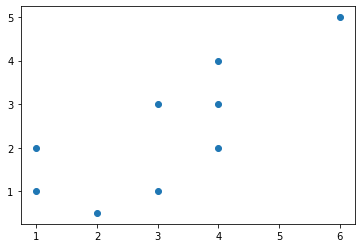

In [4]:
plt.figure(figsize = (8,8))
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

<p style='text-align:center;font-size:20px'>$ Y = \beta_0  + \beta_1 x $</p>

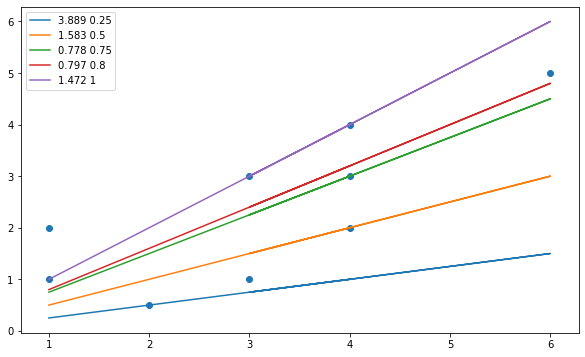

In [5]:
## Generate some random lines using the above formula
beta_0 = 0
#y intercept
beta_1 = [.25, .5, .75, .8, 1,]
#param values for slope --- which one will give us the lowest cost?
fig, ax = plt.subplots(figsize=(10,6))
mses = []
for t in beta_1:
    line = beta_0 + (np.array(x)*t)
    mse = round(mean_squared_error(y, line),3)
    mses.append(mse)
    ax.plot(x, line, label=f'{mse} {t}')
ax.scatter(x,y)
plt.legend()
plt.show()
#lines show parameter values and MSE

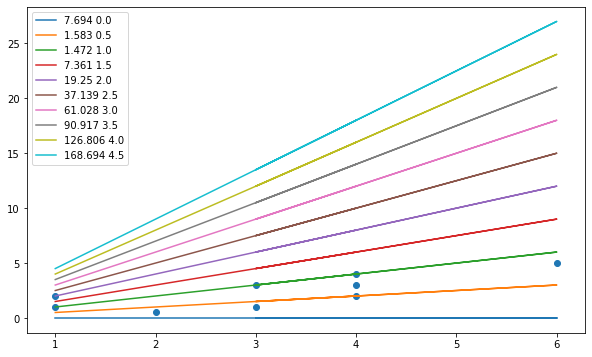

In [6]:
## Generate some random lines using the above formula
beta_0 = 0
#y intercept
#beta_1 = [.25, .5, .75, .8, 1,]
beta_1 = np.arange(0, 5, 0.5)
#param values for slope --- which one will give us the lowest cost?
fig, ax = plt.subplots(figsize=(10,6))
mses = []
for t in beta_1:
    line = beta_0 + (np.array(x)*t)
    mse = round(mean_squared_error(y, line),3)
    mses.append(mse)
    ax.plot(x, line, label=f'{mse} {t}')
ax.scatter(x,y)
plt.legend()
plt.show()
#lines show parameter values and MSE
#green

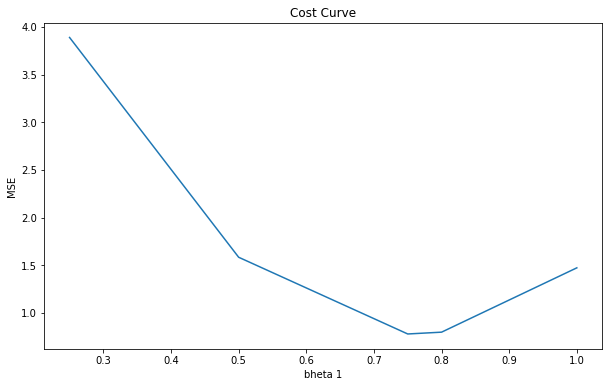

In [5]:
# Plot the Cost Curve
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(beta_1, mses)
ax.set_title('Cost Curve')
ax.set_xlabel('bheta 1')
ax.set_ylabel('MSE')
plt.show()

### What are the steps we take to get to the "bottom" of the curve? 

<img src='images/ralph.gif'/> 

## Gradient Descent

Gradient descent is an <b>algorithm</b> used to find the lowest point of a function. It is a process that helps us change our parameters (coefficients) until we get the optimal parameters of our function. 

How do we go about changing our parameters? 

The Steps:
    - Find the gradient (how steep is the curve) 
    - Multiply Learning Rate * Gradient - to calculate the amount you want to change 
    - Subtract above value from current parameter to create new parameter estimate|
    - Repeat until gradient is ~ 0 

<img src='images/gradient_desc.png'/>

### Find the Gradient

A little calculus : What does the derivative of a function tell us? 

<p style='text-align:center;font-size:20px'>$\frac{dy}{dx}$</p>
<p style='text-align:center;font-size:20px'>What does this translate to?

If a derivative tells us how much our output will change if we change a parameter just a little bit than we can use this information to update our parameter to be closer to the bottom. When our derivative is large that means our parameter is resulting in a high cost and we want to make a significant change. Conversely, if our derivative is small we don't need to make as much of a change.

#### Dealting with Multiple Parameters

<p style='text-align:center;font-size:20px'>$h_\theta(x) = \theta_0 + \theta_1 x $</p>
<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{2n}\sum_{i=1}^n (Y_i - \hat Y)^2 $</p>
<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{2n}\sum_{i=1}^n (Y_i - \theta_0 + \theta_1 x_i)^2 $</p>

When dealing with multiple parameters we need to use partial derivatives. 

<img style='width:300px' src='images/partial.png'/>

Each partial derivative tells us how much a small change in the parameter will affect the cost. Same as before. 

$ \frac{\partial J(\theta_0, \theta_1)}{\partial\theta_0} = \frac{1}{n} \sum_{i=1}^n Y_i - \theta_0 + \theta_1 x_i $

$ \frac{\partial J(\theta_0, \theta_1)}{\partial\theta_1} = \frac{1}{n} \sum_{i=1}^n (Y_i - \theta_0 + \theta_1 \sum x_i)  $

Now we know how much we need to change our parameters. 

### Learning Rate 

The learning rate helps us "soften" the amount of change we apply to a parameter? Why might we want to do this? 

https://developers.google.com/machine-learning/crash-course/fitter/graph?source=post_page---------------------------

The learning rate is usually denoted as $ \alpha $ and chosen before you start the "learning" process

### Update the Parameter

Now that we have a learning rate and a gradient, we can update our parameter and see if we can improve our model. 

<p style='text-align:center;font-size:20px'>$ \theta_j := \theta_j - \alpha * \frac{\partial J(\theta)}{\partial\theta_i} $</p>

### Convergence

We keep repeating the steps above until your parameters stop changing aka there is no more gradient. 

## Problems With Gradient Descent

### Local Minima

<img style='width:300px' src='images/local_min_meme.jpg'/>

Local minima occur when there are multiple minimum points in your cost function :

<img style='width:400px' src='images/minima.jpg' />

### Speed

The speed of gradient descent is affected by the scale of the numbers you are dealing with. Larger numbers = more surface to traverse to get to a minimum. Scaling can help speed up the process. 

## Code 

In [26]:
import numpy as np
from sklearn import linear_model

In [27]:
x = np.array(x)
y = np.array(y)
print(x)
print(y)

[1 1 2 3 4 3 4 6 4]
[2.  1.  0.5 1.  3.  3.  2.  5.  4. ]


In [28]:
ols = linear_model.LinearRegression()
ols.fit(x.reshape(-1,1), y)
print(f'theta_0: {ols.intercept_}')
print(f'theta_1: {ols.coef_[0]}')

theta_0: 0.13829787234042623
theta_1: 0.7234042553191486


In [29]:
#alpha == learning rate, max iter == when to stop


gd = linear_model.SGDRegressor(alpha=.0001, max_iter=100_000_000, tol=None
                              )
gd.fit(x.reshape(-1,1),y)
print(f'theta_0: {gd.intercept_[0]}')
print(f'theta_1: {gd.coef_[0]}')

theta_0: 0.13798819058397765
theta_1: 0.7236534784426699


## Why use gradient descent? / Pros

## Other Uses For Gradient Descent

<img style='width:300px' src='images/gradient_desc_meme.png' />

- Logistic Regression
- Decision Trees (Boosted Trees) 
- Neural Networks 

## Resources

[Understanding the Mathematics Behind Gradient Descent](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)
